In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_csv('diabetes.csv')

In [36]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [40]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [41]:
data.shape

(768, 9)

In [42]:
X = data.drop('Outcome',axis=1)
Y = data['Outcome']

In [43]:
from sklearn.preprocessing import StandardScaler

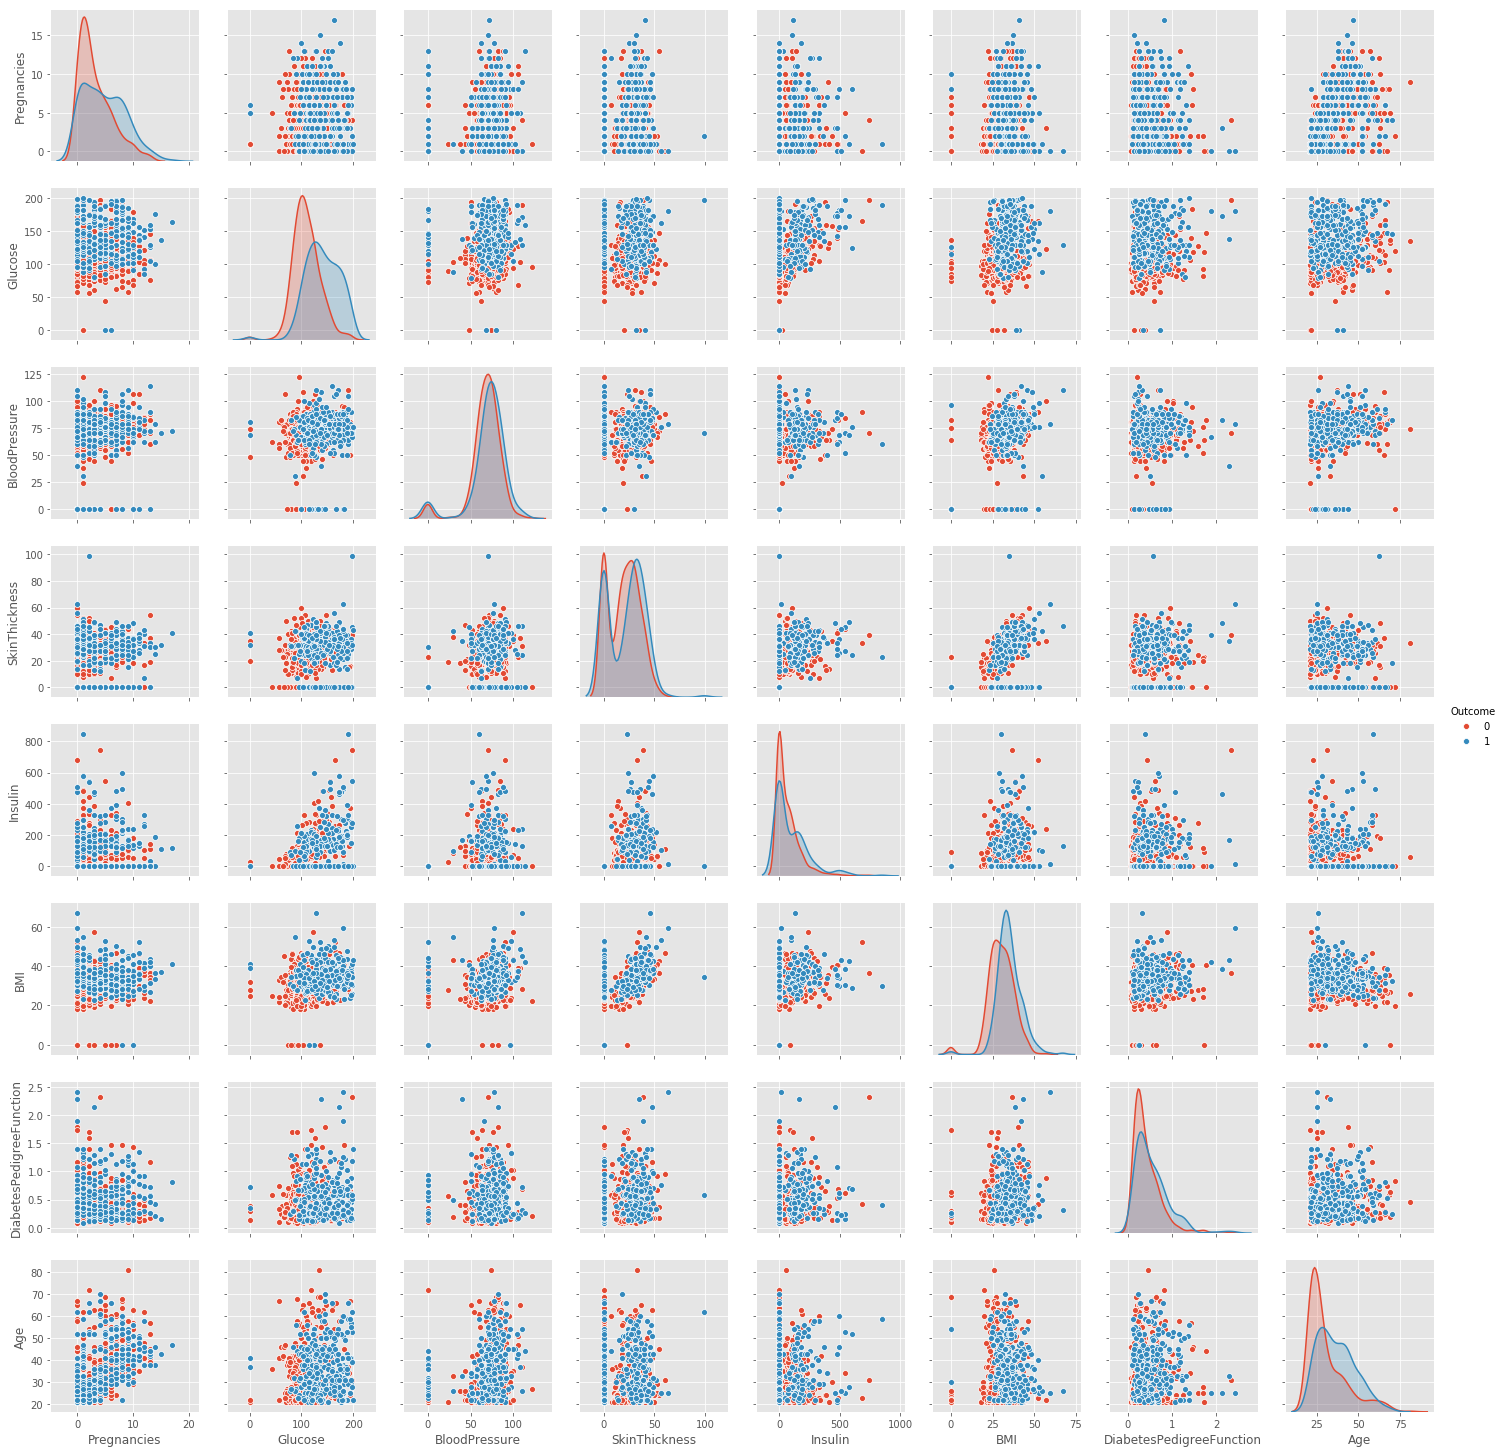

In [44]:
sns.pairplot(data,hue='Outcome')

In [45]:
standard_scalar = StandardScaler()

In [46]:
standard_scalar.fit(X)

StandardScaler()

In [47]:
scaled_features = standard_scalar.transform(X)

In [48]:
df_featured = pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [49]:
df_featured.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(df_featured,Y,test_size=0.3,stratify=Y)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
pred = knn.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(confusion_matrix(Y_test,pred))

[[124  26]
 [ 34  47]]


In [57]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [58]:
train_accuracy = []
test_accuracy =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_score = knn.score(X_train,Y_train)
    test_score = knn.score(X_test,Y_test)
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    

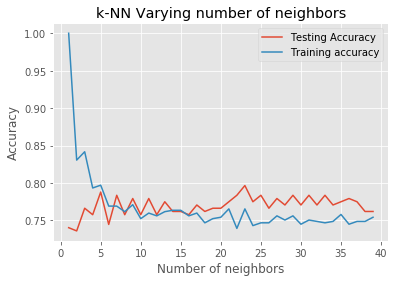

In [59]:
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,40), test_accuracy, label='Testing Accuracy')
plt.plot(range(1,40), train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
accuracy_score =[]

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,df_featured,Y,cv=10)
    accuracy_score.append(1-score.mean())

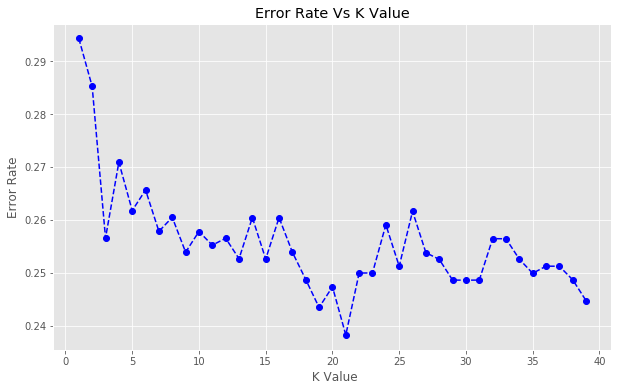

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_score,color='blue',linestyle='dashed',marker='o')
plt.title('Error Rate Vs K Value')
plt.xlabel(' K Value')
plt.ylabel('Error Rate')
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(confusion_matrix(Y_test,pred))

[[144   6]
 [ 46  35]]


In [64]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       150
           1       0.85      0.43      0.57        81

    accuracy                           0.77       231
   macro avg       0.81      0.70      0.71       231
weighted avg       0.79      0.77      0.75       231



In [65]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score

In [67]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

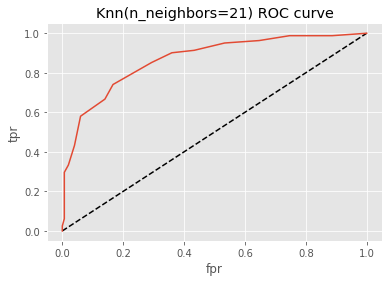

In [68]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

In [69]:
roc_auc_score(Y_test,y_pred_prob)

0.8668312757201646

 ### Logistic Regression 

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lg = LogisticRegression()

In [72]:
lg.fit(X_train,Y_train)

LogisticRegression()

In [73]:
pred = lg.predict(X_test)

In [74]:
print(confusion_matrix(Y_test,pred))

[[136  14]
 [ 34  47]]


In [75]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       150
           1       0.77      0.58      0.66        81

    accuracy                           0.79       231
   macro avg       0.79      0.74      0.76       231
weighted avg       0.79      0.79      0.78       231



In [76]:
fpr, tpr, thresholds = roc_curve(Y_test, pred)

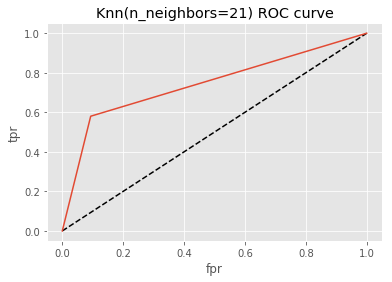

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

In [78]:
roc_auc_score(Y_test,pred)

0.7434567901234567

## Gridsearch CV

In [79]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [80]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [81]:
knn_cv.best_score_

0.746798200069228

In [82]:
knn_cv.best_params_

{'n_neighbors': 41}

In [100]:
knn = KNeighborsClassifier(n_neighbors=41)

In [101]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=41)

In [102]:
Grid_prd = knn.predict(X_test)

In [103]:
print(confusion_matrix(Y_test,Grid_prd))

[[145   5]
 [ 51  30]]


In [104]:
print(classification_report(Y_test,Grid_prd))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       150
           1       0.86      0.37      0.52        81

    accuracy                           0.76       231
   macro avg       0.80      0.67      0.68       231
weighted avg       0.78      0.76      0.73       231



In [105]:
Fpr, Tpr, thresholds = roc_curve(Y_test, Grid_prd)

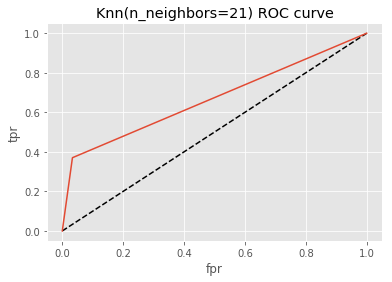

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(Fpr,Tpr, label='Knn Using Grid Search CV')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

In [107]:
roc_auc_score(Y_test,Grid_prd)

0.6685185185185185